### Detta är ett dataset som visar spel som har sålt mer än 100,000 kopior
### Källan är hämtad från www.vgchartz.com

--------------------------------

#### Importerar mina paket
Använder pandas för att visa och omvandla datan till ett dataframe och matplot/seaborn för att visualisera den


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Öppnar min csv fil 
Visar dom 5 första raderna 

In [3]:
df = pd.read_csv("./Data/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Kollar Datatyp
Första saken jag märkte var att "Year" var i datatypen float så dubbel kollade jag igenom koden här nere 
och som jag trode så var det en float

In [4]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

### Omvandlar datatyp
Jag beslutar att göra om "Year" från en float till en int för det känns mer logiskt, dom andra känns redan bra. Alla "Sales" är i miljoner så jag tycker att få det i float är bra

In [5]:
df['Year'] = df['Year'].astype("Int64")
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


### NaN
Det verkar finnas några saknade värden, jag väljer att ta bort dom helt och eftersom vi har 16598 så det är cirka 2% data vi tar bort, så jag tror inte att det har så stor betydelse.

In [6]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### Tidig märkning
Jag kan redan se flera intressanta saker
1. Dom top 10 som publiserar spelen är Nintendo     
2. Wii var en väldigt populär konsol. 
3. Dom flesta som köpte kom ochså från nord amerika.    
4. Duck Hunt såldes nästan bara i USA, kanske för många där är intresserade av vapen?
5. Spel förr verkar vara mer barnvänliga och lugna medans nu för tiden så är topp spelen mer actionfyllda och våldsamma

### Är datat bra?
Jag tycker att detta verkat som ett bra dataset, det fanns några NAN men jag valde att ta bort dom och behövde bara ändra en datatyp. Den innehåller inte för många colummner utan visar det viktigaste. Kanske några tycker att Japan är en onödig column och kunndes läggas tillsammans med "Other_Sales" men Japan har vart ett otroligt viktigt land för spel så jag tycker att den kan få ha sin egen column. En sak jag vill ta reda på är mellan vilka år den visar

--------------------

Ser lite rörigt ut så ska sortera det

In [9]:
df['Year'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2003, 1986, 2000, 1995, 2016, 1991, 1981, 1987, 1980, 1983, 2020, 2017]
Length: 39, dtype: Int64

Så datat visar mellan 1980 till 2020. (förutom 2018,2019)

In [10]:
year = (sorted(df['Year'].unique()))
year

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2020]

### Visualisering

Hur många spel som såldes varje år är intressant att veta och vi kan se här att ju längre fram vi kommer desto populärare blir spel, en faktor är att konsoler/datorer blir bara mer och mer tillgänliga till alla. Man ser speciellt att försäljningen sköt rakt upp 1996, om man googlar lite på de året ser man att många kallar det "golden year of gaming" som kan ha bidraget till detta.

In [11]:
sorted_by_date_df = df.groupby(by=['Year'])['Global_Sales'].sum()
sorted_by_date_df = sorted_by_date_df.reset_index()
sorted_by_date_df.sort_values(by=['Year'], ascending=True)

,Year,Global_Sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36
5,1985,53.94
6,1986,37.07
7,1987,21.74
8,1988,47.22
9,1989,73.45


Vi kan också se vem som har sålt dom flesta spelen och kan enkelt see att Nintendo har tagit den stora ledningen över alla andra

In [16]:
sorted_by_Publisher_df = df.groupby(by=['Publisher'])['Global_Sales'].sum()
sorted_by_Publisher_df = sorted_by_Publisher_df.reset_index()
sorted_by_Publisher_df.sort_values(by=['Global_Sales'], ascending=False,)

,Publisher,Global_Sales
359,Nintendo,1784.43
138,Electronic Arts,1093.39
21,Activision,721.41
455,Sony Computer Entertainment,607.28
524,Ubisoft,473.54
...,...,...
147,Epic Games,0.01
389,Paradox Development,0.01
421,Rain Games,0.01
45,Ascaron Entertainment,0.01


Här nere ser man att dom flesta spelen är action spel och dom minsta är pussel spel.

<AxesSubplot: title={'center': 'Mest sålda spel per kategori'}, xlabel='Genre', ylabel='count'>

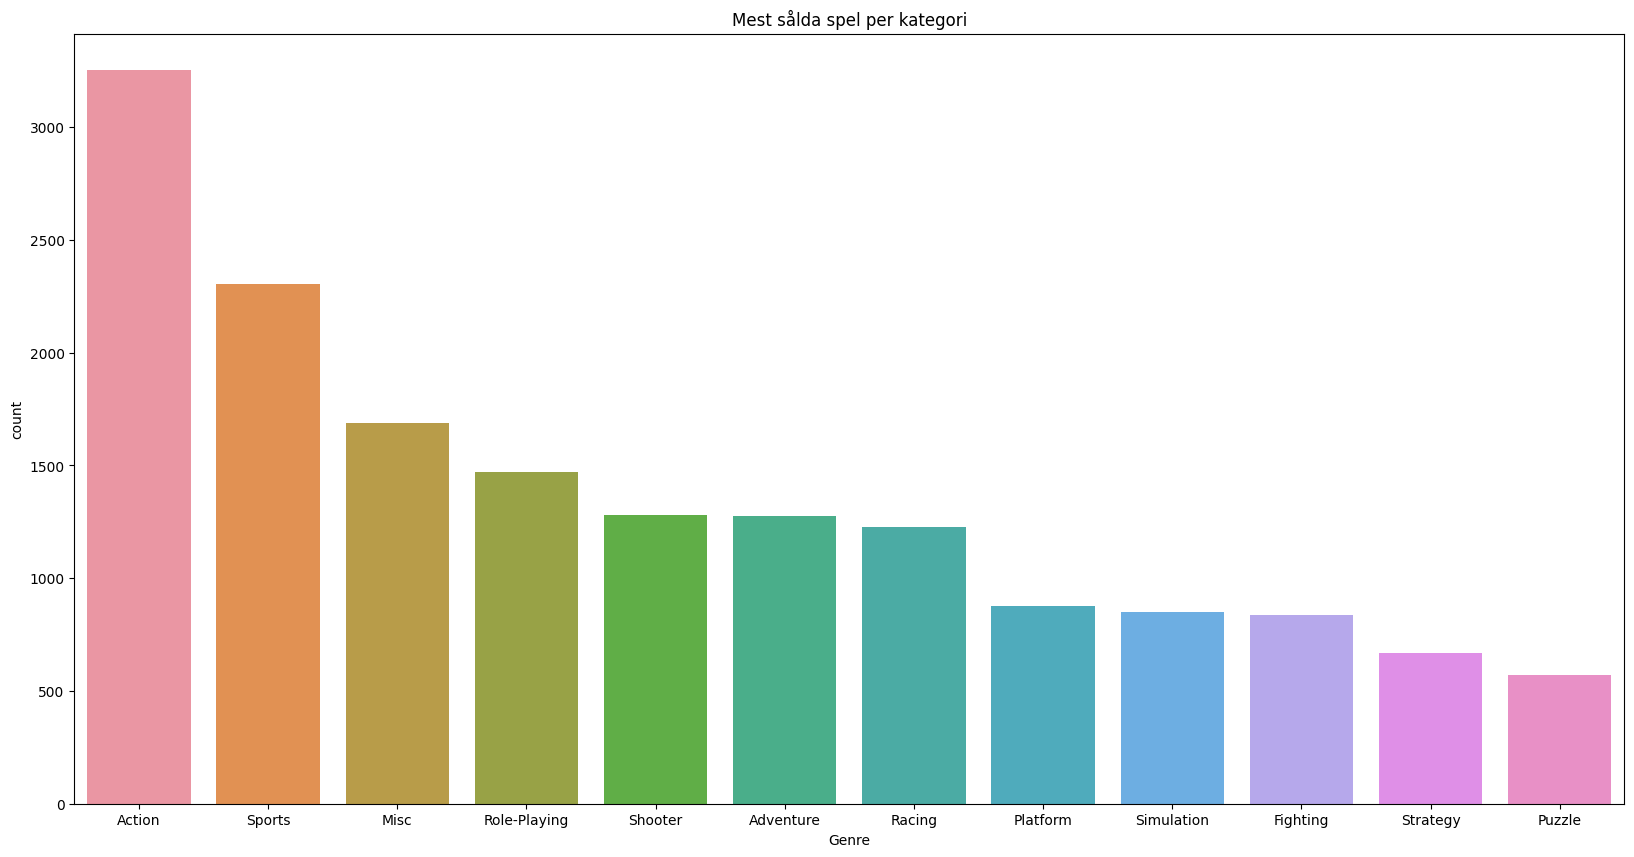

In [92]:
plt.figure(figsize=(20,10))
plt.title('Mest sålda spel per kategori')
sns.countplot(data=df, x = 'Genre', order = df['Genre'].value_counts().index)

Denna grafen stärker mina tankar om att spel blir mer och mer populära

<AxesSubplot: title={'center': 'Mest sålda spel per kategori'}, xlabel='Year', ylabel='count'>

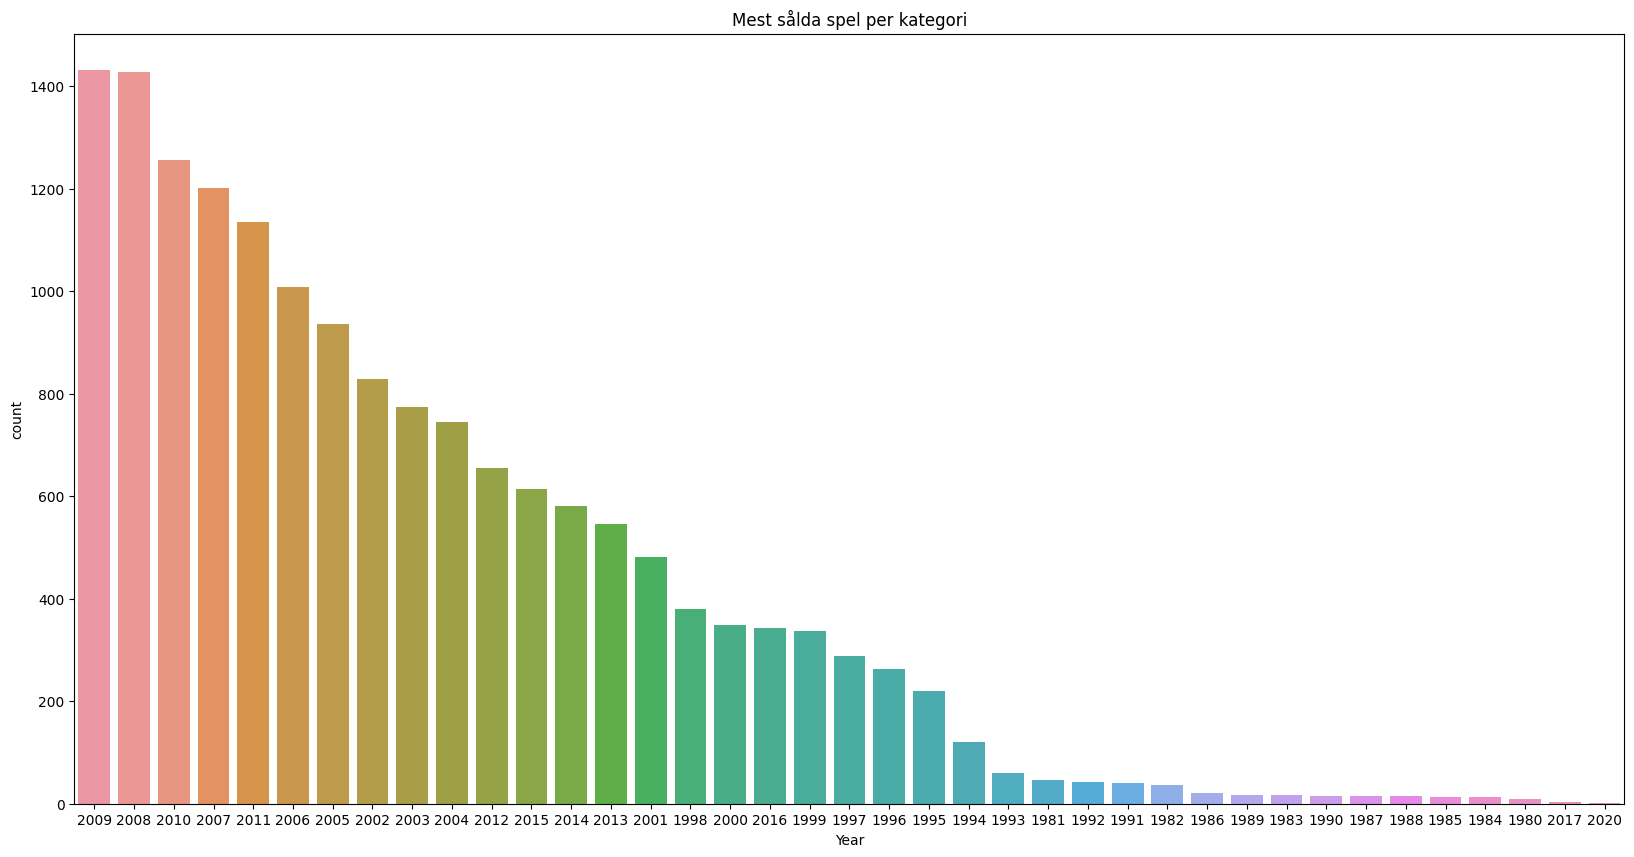

In [40]:
plt.figure(figsize=(20,10))
plt.title('Mest sålda spel per kategori')
sns.countplot(data=df, x = 'Year', order = df['Year'].value_counts().index)

### Slutnoter

Man kunde ha gjort datat bättre genom att uppdatera den. Det saknades 2 årtal och 2020 verka som ett dåligt år för spel men min gissning är att den är inte helt uppdaterad (vilket vi kan se här nere så finns bara 1 spel med från 2020). Så man kanske skulle uppdatera den eller ta bort år 2020 så inte det verka som att spel har dött ut.

In [50]:
df.loc[df['Year'] == 2020]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29
